In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/carolinecharrier/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
cd /Users/carolinecharrier/Projet7/

/Users/carolinecharrier/Projet7


## Import datatrame principal (income et gdp ppp)

In [3]:
data= pd.read_excel('input/data-projet7.xlsx')
data

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305


In [4]:
#sns.scatterplot(x=data.loc[data['country'] == 'LTU']['quantile'], y=data.loc[data['country'] == 'LTU']['income'].cumsum())
# list(data.loc[data['country'] == 'LTU','quantile']) # quantile number 41 missing 
#data.loc[data['country'] == 'LTU']
#data.loc[(data['country'] == 'LTU') & (data['quantile'] > 37)]
#quantile_41 = (4868.4507 + 4895.8306)/2
data.loc[12000] = ['LTU', 2008, 41, 100, 4882.14065, 17571.0]


In [5]:
data.dtypes

country          object
year_survey       int64
quantile          int64
nb_quantiles      int64
income          float64
gdpppp          float64
dtype: object

## 1. Effectif de pays en entrée de l'étude

In [6]:
a = data.loc[data['quantile'] == 1].groupby('year_survey').count().country.reset_index()
a

,year_survey,country
0,2004,1
1,2006,5
2,2007,15
3,2008,76
4,2009,12
5,2010,6
6,2011,1


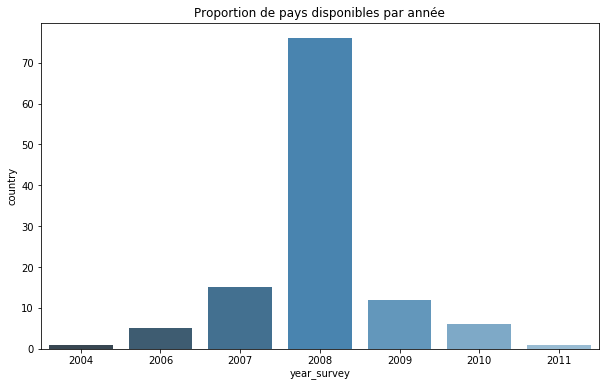

In [7]:
#data.loc[data['quantile'] == 1].groupby('year_survey').count().country
a = data.loc[data['quantile'] == 1].groupby('year_survey').count().country.reset_index()
plt.figure(figsize=(10,6))
plt.title('Proportion de pays disponibles par année')
plt.xlabel("Année de l'étude")
plt.ylabel("Nombre de pays")
fig = sns.barplot(x=a['year_survey'], y=a['country'], data=a,palette="Blues_d")

In [8]:
# Listes de pays par année
countries_2004 = set(data.loc[(data['year_survey'] == 2004)].country)
countries_2006 = set(data.loc[(data['year_survey'] == 2006)].country)
countries_2007 = set(data.loc[(data['year_survey'] == 2007)].country)
countries_2008 = set(data.loc[(data['year_survey'] == 2008)].country)
countries_2009 = set(data.loc[(data['year_survey'] == 2009)].country)
countries_2010 = set(data.loc[(data['year_survey'] == 2010)].country)
countries_2011 = set(data.loc[(data['year_survey'] == 2011)].country)

## 2. Correction des valeurs abbérantes

### Income 

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

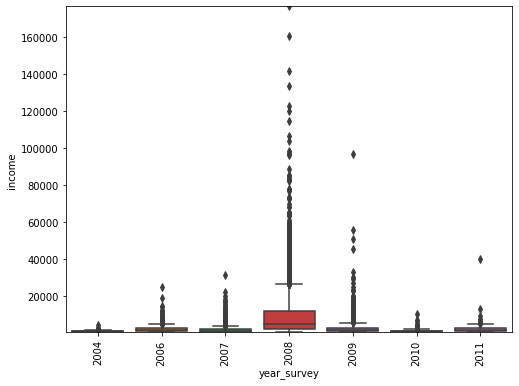

In [9]:
#Distribution de income par année
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=data.year_survey, y=data.income, data=data)
fig.axis(ymin=data.income.min(), ymax=data.income.max())
plt.xticks(rotation=90)

### Gdp ppp 

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

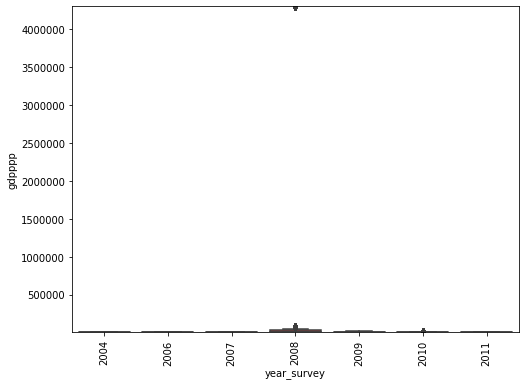

In [10]:
# Distribution sur gdpppp par année
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=data.year_survey, y=data.gdpppp, data=data.loc[data['quantile'] == 1])
fig.axis(ymin=data.gdpppp.min(), ymax=data.gdpppp.max())
plt.xticks(rotation=90)

In [11]:
# 1. data.sort_values('gdpppp', ascending = False)
# 2. Correction de gdp ppp pour country = FJI 
# 3. data.loc[data['country'] == 'FJI'].index 
data.loc[3200:3299,'gdpppp'] = 7366
data.loc[data['country'] == 'FJI']

,country,year_survey,quantile,nb_quantiles,income,gdpppp
3200,FJI,2008,1,100,308.17334,7366.0
3201,FJI,2008,2,100,384.33230,7366.0
3202,FJI,2008,3,100,436.59265,7366.0
3203,FJI,2008,4,100,486.81436,7366.0
3204,FJI,2008,5,100,520.19720,7366.0
...,...,...,...,...,...,...
3295,FJI,2008,96,100,5481.08200,7366.0
3296,FJI,2008,97,100,6205.61400,7366.0
3297,FJI,2008,98,100,7265.12550,7366.0
3298,FJI,2008,99,100,9553.19200,7366.0


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

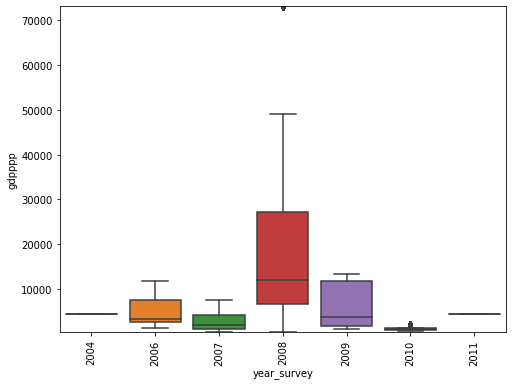

In [12]:
# Distribution sur gdpppp par année
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=data.year_survey, y=data.gdpppp, data=data.loc[data['quantile'] == 1])
fig.axis(ymin=data.gdpppp.min(), ymax=data.gdpppp.max())
plt.xticks(rotation=90)

## 3. Traitement des valeurs manquantes

In [13]:
# Controle sur les valeurs manquantes
print('data columns with null values:\n', data.isnull().sum())
print("-"*10)

data columns with null values:
 country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64
----------


### Gdp ppp 

In [14]:
# 1. data.loc[data['gdpppp'].isnull()].country
# 2. Retraitement de gdp ppp pour country = XKX + PSE
# 3. data.loc[data['country'] == 'XKX'].index 
data.loc[5800:5899,'gdpppp'] = 7544
data.loc[11199:11298,'gdpppp'] = 3606

In [15]:
# Controle sur les valeurs manquantes
print('data columns with null values:\n', data.isnull().sum())
print("-"*10)

data columns with null values:
 country         0
year_survey     0
quantile        0
nb_quantiles    0
income          0
gdpppp          0
dtype: int64
----------


In [16]:
# Liste des pays dans data
study_country = set(data.loc[(data['quantile'] == 1)].country)

## Import population 

In [17]:
pop = pd.read_excel('input/pop_P7.xls')
pop.columns = ['country_name','country','population_2004','population_2005','population_2006','population_2007','population_2008','population_2009','population_2010','population_2011']
pop

,country_name,country,population_2004,population_2005,population_2006,population_2007,population_2008,population_2009,population_2010,population_2011
0,Aruba,ABW,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0
1,Afghanistan,AFG,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0
2,Angola,AGO,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0
3,Albanie,ALB,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0
4,Andorre,AND,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0
...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0
260,"Yémen, Rép. du",YEM,19540098.0,20107409.0,20687646.0,21282515.0,21892146.0,22516460.0,23154855.0,23807588.0
261,Afrique du Sud,ZAF,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52004172.0
262,Zambie,ZMB,11550642.0,11856247.0,12173514.0,12502958.0,12848530.0,13215139.0,13605984.0,14023193.0


In [18]:
pop.dtypes

country_name        object
country             object
population_2004    float64
population_2005    float64
population_2006    float64
population_2007    float64
population_2008    float64
population_2009    float64
population_2010    float64
population_2011    float64
dtype: object

In [19]:
# Controle sur les valeurs manquantes
print('data columns with null values:\n', pop.isnull().sum())
print("-"*10)

data columns with null values:
 country_name       0
country            0
population_2004    1
population_2005    1
population_2006    1
population_2007    1
population_2008    1
population_2009    1
population_2010    1
population_2011    1
dtype: int64
----------


In [20]:
data = pd.merge(data.loc[data['country'].isin(study_country)],pop, on = 'country',how ='left')
data

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,population_2004,population_2005,population_2006,population_2007,population_2008,population_2009,population_2010,population_2011
0,ALB,2008,1,100,728.89795,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0
1,ALB,2008,2,100,916.66235,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0
2,ALB,2008,3,100,1010.91600,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0
3,ALB,2008,4,100,1086.90780,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0
4,ALB,2008,5,100,1132.69970,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,58453683.0,60411195.0,62448574.0,64563854.0,66755153.0
11596,COD,2008,98,100,1057.80740,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,58453683.0,60411195.0,62448574.0,64563854.0,66755153.0
11597,COD,2008,99,100,1286.60290,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,58453683.0,60411195.0,62448574.0,64563854.0,66755153.0
11598,COD,2008,100,100,2243.12260,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,58453683.0,60411195.0,62448574.0,64563854.0,66755153.0


## Import indice de Gini

In [21]:
gini = pd.read_excel('input/gini_P7-mai2020.xls')
gini.columns = ['country_name','country','gini_2004','gini_2005','gini_2006','gini_2007',
                'gini_2008','gini_2009','gini_2010','gini_2011','gini_2012','gini_2013',
                'gini_2014','gini_2015','gini_2016','gini_2017','gini_2018','gini_2019'
               ]

gini

,country_name,country,gini_2004,gini_2005,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,gini_2012,gini_2013,gini_2014,gini_2015,gini_2016,gini_2017,gini_2018,gini_2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN
3,Albania,ALB,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,31.2,30.3,NaN,NaN,31.8,33.3,27.8,29.0,26.3,27.3,26.5,26.7,29.0,NaN,NaN
260,"Yemen, Rep.",YEM,NaN,34.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,NaN,64.8,NaN,NaN,63.0,NaN,63.4,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,54.3,NaN,54.6,NaN,NaN,NaN,55.6,NaN,NaN,NaN,NaN,57.1,NaN,NaN,NaN,NaN


In [22]:
# Controle sur les valeurs manquantes
print('data columns with null values:\n', gini['gini_2008'].isnull().sum())
print("-"*10)

data columns with null values:
 192
----------


In [23]:
df = pd.merge(data.loc[data['country'].isin(study_country)],gini,on='country', how='left')
df

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name_x,population_2004,population_2005,population_2006,...,gini_2010,gini_2011,gini_2012,gini_2013,gini_2014,gini_2015,gini_2016,gini_2017,gini_2018,gini_2019
0,ALB,2008,1,100,728.89795,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN
1,ALB,2008,2,100,916.66235,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN
2,ALB,2008,3,100,1010.91600,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN
3,ALB,2008,4,100,1086.90780,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN
4,ALB,2008,5,100,1132.69970,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,NaN,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11596,COD,2008,98,100,1057.80740,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,NaN,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11597,COD,2008,99,100,1286.60290,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,NaN,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11598,COD,2008,100,100,2243.12260,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,NaN,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Recaclul des indices de gini 2008
missing_gini_2008 = set(df.loc[df['gini_2008'].isnull()].country)
A = df.loc[:,['country','quantile','income']]
A = pd.pivot_table(A, values='income', index=['quantile'],
                    columns=['country'], aggfunc=np.min)
A

country,ALB,ARG,ARM,AUT,AZE,BEL,BFA,BGD,BGR,BIH,...,TZA,UGA,UKR,URY,USA,VEN,VNM,XKX,YEM,ZAF
quantile,,,,,,,,,,,,,,,,,,,,,
1,728.89795,254.08942,366.61780,2958.0764,397.53983,2421.9417,138.40517,276.93503,271.09310,808.3991,...,84.04393,121.17981,942.38495,472.62976,663.4761,171.89282,234.26695,437.89370,162.95131,60.490383
2,916.66235,470.50150,535.32733,4893.4673,597.77320,3812.5588,189.70877,332.78653,614.30676,1159.1816,...,114.87257,177.99182,1155.78630,706.53360,1698.0868,320.91818,305.54657,508.17133,241.20471,138.341550
3,1010.91600,623.45420,611.64560,5459.6490,705.47003,4534.7540,221.71008,359.20620,796.17330,1393.4263,...,133.93263,206.01480,1264.16050,821.38370,2439.7354,412.59680,344.04184,591.82820,274.72772,192.294500
4,1086.90780,734.97455,658.33940,5923.5854,785.52610,5019.0020,239.23239,377.34985,963.79090,1572.5999,...,145.29988,227.92514,1356.31840,911.69850,3054.2478,497.08100,369.97820,668.00000,299.72230,236.994000
5,1132.69970,832.31850,690.84710,6380.2780,841.75244,5442.7627,254.17284,392.61746,1048.52170,1692.3044,...,156.69585,243.86502,1435.11470,986.91656,3627.5483,548.97880,393.53284,730.40220,319.84152,279.367580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,6231.09960,16618.87300,3229.55370,33914.1050,5283.54700,29376.9280,2373.90300,2302.00420,12422.03200,15303.2520,...,1470.85050,2837.94400,6614.26660,15500.59900,69926.3700,8780.08700,3521.14060,5155.36470,2568.65110,24553.568000
97,6822.31840,18226.73000,3466.66500,36080.9020,5802.63800,31054.9260,2682.05000,2515.92290,13820.51400,16466.6290,...,1634.96230,3314.31000,7025.23240,17204.84400,77634.8200,9802.27900,3879.63200,5689.52930,2893.90400,28858.031000
98,7775.89100,20528.30500,3758.60180,39450.5550,6366.05900,34044.5600,3130.35840,2829.58300,15152.43500,18239.7970,...,1882.94910,3872.80600,7549.72460,19805.24000,88482.8400,11221.35500,4378.40140,6233.73930,3307.27220,35750.290000


In [25]:
def gini(x):
    count = x.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * x).sum()
    total = x.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

In [26]:
A = A.apply(lambda x: gini(x)*100, axis = 0).to_frame()
A.reset_index()

,country,0
0,ALB,30.462429
1,ARG,44.990165
2,ARM,26.310763
3,AUT,27.827911
4,AZE,31.232118
...,...,...
111,VEN,43.402135
112,VNM,37.748096
113,XKX,31.447461
114,YEM,37.416124


In [27]:
df = pd.merge(df,A,on="country",how='left')
df

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name_x,population_2004,population_2005,population_2006,...,gini_2011,gini_2012,gini_2013,gini_2014,gini_2015,gini_2016,gini_2017,gini_2018,gini_2019,0
0,ALB,2008,1,100,728.89795,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,30.462429
1,ALB,2008,2,100,916.66235,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,30.462429
2,ALB,2008,3,100,1010.91600,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,30.462429
3,ALB,2008,4,100,1086.90780,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,30.462429
4,ALB,2008,5,100,1132.69970,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,30.462429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.399690
11596,COD,2008,98,100,1057.80740,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.399690
11597,COD,2008,99,100,1286.60290,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.399690
11598,COD,2008,100,100,2243.12260,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,42.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.399690


## Taux de couverture étude

In [28]:
pop_etude = data.loc[(data['quantile'] == 1)].population_2008.sum()
Pop_mondiale_2008 = 6616356000
nb_pays_etude = data.loc[data['quantile'] == 1].country.count()
print('Population couverte par etude :',pop_etude, 'personnes')
print('Part couverte par etude',(pop_etude*100)/Pop_mondiale_2008,'%')
print('Nombre de pays couvert par etude :', nb_pays_etude,'pays')

Population couverte par etude : 6181009509.0 personnes
Part couverte par etude 93.42014711723492 %
Nombre de pays couvert par etude : 116 pays


## Import des coefficients d'elasticité

In [29]:
df_ce = pd.read_csv("input/GDIMMay2018.csv")
df_ce = df_ce.drop(df_ce.loc[df_ce['IGEincome'].isnull()].index)
df_ce = df_ce.loc[(df_ce['parent'] == 'avg') & (df_ce['child'] == 'all'),['countryname','iso3','IGEincome']]
df_ce.rename(columns={'countryname': 'country_name_x', 'iso3': 'country'}, inplace=True)
df3 = pd.merge(df,df_ce,on ='country',how='left')
df3

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name_x_x,population_2004,population_2005,population_2006,...,gini_2013,gini_2014,gini_2015,gini_2016,gini_2017,gini_2018,gini_2019,0,country_name_x_y,IGEincome
0,ALB,2008,1,100,728.89795,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,34.6,32.9,33.7,33.2,NaN,NaN,30.462429,Albania,0.815874
1,ALB,2008,2,100,916.66235,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,34.6,32.9,33.7,33.2,NaN,NaN,30.462429,Albania,0.815874
2,ALB,2008,3,100,1010.91600,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,34.6,32.9,33.7,33.2,NaN,NaN,30.462429,Albania,0.815874
3,ALB,2008,4,100,1086.90780,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,34.6,32.9,33.7,33.2,NaN,NaN,30.462429,Albania,0.815874
4,ALB,2008,5,100,1132.69970,7297.00000,Albanie,3026939.0,3011487.0,2992547.0,...,NaN,34.6,32.9,33.7,33.2,NaN,NaN,30.462429,Albania,0.815874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.399690,NaN,NaN
11596,COD,2008,98,100,1057.80740,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.399690,NaN,NaN
11597,COD,2008,99,100,1286.60290,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.399690,NaN,NaN
11598,COD,2008,100,100,2243.12260,303.19305,"Congo, République démocratique du",53068880.0,54785903.0,56578037.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.399690,NaN,NaN


In [30]:
# Pays présent dans 1er fichier
set(df3.loc[df3['quantile'] == 1].country)
# Aller chercher dans fichier txt
set(df3.loc[df3['IGEincome'].isnull()].country_name_x_x)

{'Argentine',
 'Arménie',
 'Azerbaïdjan',
 'Bangladesh',
 'Bhoutan',
 'Bulgarie',
 'Burkina Faso',
 'Cambodge',
 'Cameroun',
 'Cisjordanie et Gaza',
 'Congo, République démocratique du',
 'Costa Rica',
 "Côte d'Ivoire",
 'El Salvador',
 'Estonie',
 'Eswatini',
 'Fidji',
 'Géorgie',
 'Honduras',
 'Hongrie',
 'Indonésie',
 'Iran, République islamique d’',
 'Iraq',
 'Islande',
 'Israël',
 'Kosovo',
 'Libéria',
 'Lituanie',
 'Luxembourg',
 'Mauritanie',
 'Mexique',
 'Moldova',
 'Monténégro',
 'Mozambique',
 'Nicaragua',
 'Niger',
 'Paraguay',
 'Philippines',
 'Pologne',
 'République arabe syrienne',
 'République centrafricaine',
 'République dominicaine',
 'République démocratique populaire lao',
 'Serbie',
 'Soudan',
 'Sri Lanka',
 'Tadjikistan',
 'Thaïlande',
 'Turquie',
 'Ukraine',
 'Uruguay',
 'Venezuela',
 'Yémen, Rép. du'}

## Imputation des valeurs manquantes

In [31]:
#Nordic European countries and Canada |    0.2     | 
list_europe_north_ce= {'Islande'}

#Europe (except nordic countries)     |    0.4     |   
list_europe_middle_ce=  {'Arménie',
 'Bulgarie',
 'Géorgie',
 'Kosovo',
 'Estonie',
 'Luxembourg',
 'Hongrie',
 'Lituanie',
 'Moldova',
 'Monténégro',
 'Pologne',
 'Serbie',
 'Turquie',
 'Ukraine'}


#Australia/New Zealand/USA            |    0.4     |

#Asia                                 |    0.5     |
list_asia_ce =  {'Bangladesh',
 'Cambodge',
 'Azerbaïdjan',
 'Cisjordanie et Gaza',
 'Thaïlande',
 'Philippines',
 'Fidji',
 'Indonésie',
 'Iran, République islamique d’',
 'Iraq',
 'Israël',
 'République arabe syrienne',
 'Yémen, Rép. du',
 'Sri Lanka',
 'Tadjikistan',
 'République démocratique populaire lao'}


#Latin America/Africa                 |    0.5     |
list_africa_america_ce = {'Argentine',
 "Côte d'Ivoire",
 'Burkina Faso',
 'Cameroun',
 'Congo, République démocratique du',
 'Honduras',
 'Mexique',
 'Nicaragua',
 'Mozambique',
 'Niger',
 'Paraguay',
 'Bhoutan',
 'Costa Rica',
 'El Salvador',
 'Eswatini',
 'Libéria',
 'Mauritanie',
 'République centrafricaine',
 'République dominicaine',
 'Soudan',
 'Uruguay',
 'Venezuela'}

In [32]:
df3.loc[df3['country_name_x_x'].isin(list_europe_north_ce),'IGEincome'] = 0.2
df3.loc[df3['country_name_x_x'].isin(list_europe_middle_ce),'IGEincome'] = 0.4
df3.loc[df3['country_name_x_x'].isin(list_asia_ce),'IGEincome'] = 0.5
df3.loc[df3['country_name_x_x'].isin(list_africa_america_ce),'IGEincome'] = 0.5

In [33]:
set(df3.loc[df3['IGEincome'].isnull()].country_name_x_x)

set()

In [34]:
df3 = df3.loc[:,['country','year_survey','quantile','income','gdpppp','country_name_x_x',0,'IGEincome']]
df3.columns = ['country','year_survey','quantile','income','gdpppp','country_name','gini','IGEincome']

## Export vers tableau pour visualisation


In [35]:
data.to_excel('output/data_cleaned_viz.xlsx')
df.to_excel('output/df_all_merged.xlsx')
df3.to_excel('output/df3.xlsx')